# ML Course 2 - Practice

## Subject

We provide here a data set on the customers of a bank:
- CustomerId = customer id in the information system of the bank
- Surname = surname of the customer
- CreditScore = score attributed by the bank as estimation of capacity to reimburse a loan
- Geography = country of the customer
- Gender = sex of the customer
- Age = age of the customer
- Tenure = loan duration (year)
- Balance = amount of money on main account (\$)
- NumOfProducts = number of products the customer has in the banl
- HasCrCard = tells if the customer owns a credit card
- IsActiveMember = tells if the customer has an active account
- EstimatedSalary = estimated salary of the customer (\$)
- Exited = tells if the customer has left the bank

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.ticker as mtick


In [2]:
dataset_raw = pd.read_csv('bank_churn.csv')
dataset_raw.sample(n=10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7131,7132,15704509,Tan,492,France,Male,35,8,121063.49,1,0,0,85421.48,0
7693,7694,15602043,Buccho,770,Germany,Female,46,5,141788.63,2,0,0,164967.21,0
4825,4826,15726153,Fanucci,622,France,Male,31,5,106260.67,1,1,1,2578.43,0
6973,6974,15583394,Zuyev,659,Germany,Male,39,8,106259.63,2,1,1,198103.32,0
9130,9131,15790599,Yin,756,Germany,Female,39,5,149363.12,2,1,1,109098.39,0
1823,1824,15711219,Jennings,788,Germany,Female,57,8,93716.72,1,1,1,180150.49,1
3537,3538,15632324,Pisani,602,France,Male,59,7,0.00,2,1,1,162347.05,0
3657,3658,15602124,Badgery,731,France,Male,30,7,0.00,2,1,1,184581.68,0
2274,2275,15808044,Ts'ui,580,France,Female,65,9,106804.26,3,1,0,107890.69,1
5679,5680,15621974,Davydova,778,Germany,Female,33,4,111063.73,2,1,0,83556.65,0


The objective of the bank is to predict the churn, i.e. if a customer is likely to leave the bank, based on his/her profile (estimated salary, geography, age, etc.).
Here, we will prepare the data set so that it can be directly used for ML processing. The work is limited to data exploration and preparation, we will not make ML prediction yet.

Your tasks:
- Make some data exploration with at least three plots of your choice. Choose plots that provide interesting and meaningful information. 
Examples: distribution of the values within one feature, repartition of a feature depending on the target value, etc.  
For each graph, you must:
    - Plot the graph
    - Povide a title, axis labels and legend if applicable
    - Write a Markdown cell underneath to explain what insights you can draw from your graph. 
- Prepare the data set. Example: dropping irrelevant data, preparing the predictors and the response, data encoding, train/test split, data scaling.
    - Explain why you drop a features
    - Explain your choice of encoding
   
Bonus: Feature Engineering!  
Enrich the dataset by creating new features for your model to learn on. It can be a combination of other features or combining with external information.

Text(0.5, 1.0, 'Customer Churn')

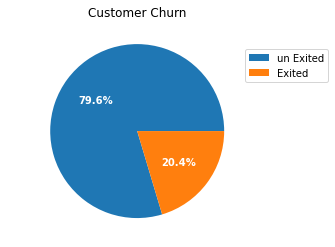

In [3]:
# Distribution of Exited
x=dataset_raw.groupby(['Exited']).size()
plt.pie(x, labels=['un Exited','Exited'],autopct='%1.1f%%',textprops=dict(color="white",weight='bold'));
plt.legend(loc='center right', bbox_to_anchor=(1,0.3,0.4,1))
plt.title('Customer Churn')

The objective of the bank is to predict the churn. So, the basic thing we need to know is what percentage of customers stay and leave at the present time. This graph shows that 20.4 Exited (left), 79.6% un Exited (stay)

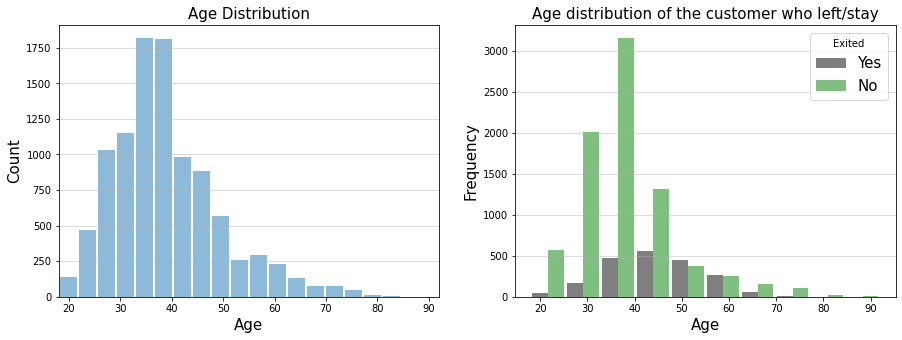

In [4]:
# Dustribution Age 
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
plt.hist(dataset_raw['Age'], bins=20,alpha=0.5, rwidth=0.9)
plt.ylabel('Count',fontsize = 15)
plt.xlabel('Age',fontsize = 15)
plt.title('Age Distribution',fontsize = 15)
plt.grid(axis='y', alpha=0.55)
plt.xlim(18,92)

plt.subplot(1, 2, 2)
# Method 2
age_left = dataset_raw['Age'][dataset_raw['Exited']==1]
# Take Age data with condition Survived ==0
age_stay = dataset_raw['Age'][dataset_raw['Exited']==0]
# Take Age data with condition Survived ==1
plt.hist(x = [age_left, age_stay],stacked= False , color=['black', 'Green'],alpha=0.5, rwidth=0.9)
plt.grid(axis='y', alpha=0.55)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age distribution of the customer who left/stay', fontsize = 15)
plt.legend(['Yes', 'No'], title='Exited',fontsize = 15)
plt.show()

From the left chart:
The majority of customers of this bank are from 25 to 45 years old, accounting for the majority, this age corresponds to the working age and they have income.
From the right chart:
Old people tend to stay with this bank for a long time.
Customer between the ages of 50 and 60 are more likely to leave the bank than stay at the bank. Maybemaybe at this age they have large assets and want to choose another bank with a higher interest rate.

In [5]:
dataset_raw.groupby(['Exited']).size()

Exited
0    7963
1    2037
dtype: int64

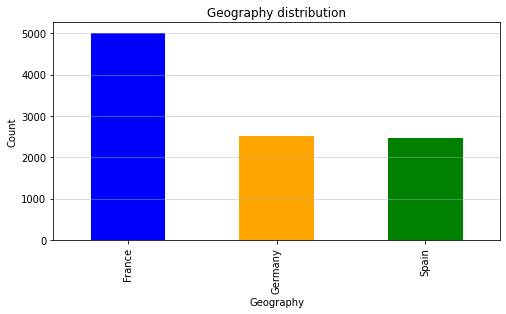

In [6]:
# Let's see Average fare for different SES
plt.figure(figsize=[8,4])
Geography=dataset_raw.groupby(['Geography']).size()
Geography.plot(kind='bar',color=['Blue', 'orange','green'])
plt.ylabel('Count')
plt.title('Geography distribution')
plt.grid(axis='y', alpha=0.55)



This bank's customers have 3 groups, France, Germany, Spain, Among the three countries, the number of customers in France accounts for the majority.

<Figure size 648x360 with 0 Axes>

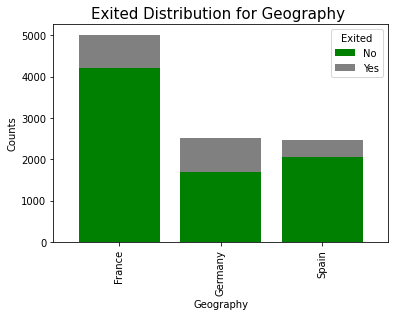

In [7]:
plt.figure(figsize=[9,5])
x= dataset_raw.groupby(['Geography','Exited']).size().unstack()
Bank_barplot =  x.plot.bar(stacked=True,color = [ "Green","Grey"],width=0.8)
plt.ylabel("Counts",fontsize = 10)
plt.xlabel('Geography',fontsize = 10)
plt.xticks((0,1,2), ('France','Germany','Spain'),fontsize = 10)
plt.legend(['No', 'Yes'], title='Exited',fontsize = 10)
plt.title('Exited Distribution for Geography ',fontsize = 15)

plt.show()

Geographic location can determine the success of your bank and can be a great tool to know that your market as France has a large number of customers with low churn.

<Figure size 648x360 with 0 Axes>

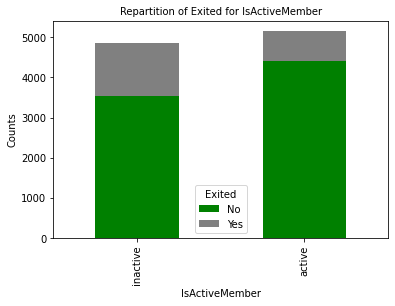

In [8]:
plt.figure(figsize=[9,5])
x= dataset_raw.groupby(['IsActiveMember','Exited']).size().unstack()
Bank_barplot =  x.plot.bar(stacked=True,color = [ "Green","Grey"],width=0.5)
plt.ylabel("Counts",fontsize = 10)
plt.xlabel('IsActiveMember',fontsize = 10)
plt.xticks((0,1), ('inactive','active'),fontsize = 10)
plt.legend(['No', 'Yes'], title='Exited',fontsize = 10)
plt.title('Repartition of Exited for IsActiveMember',fontsize = 10)
plt.show()



It's no wonder that inactive customers are more churn than active customers

<Figure size 648x360 with 0 Axes>

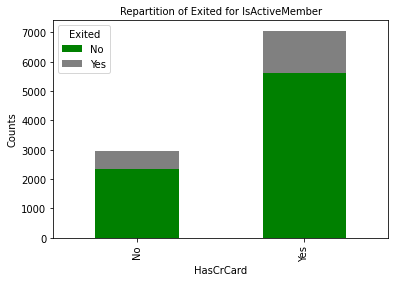

In [9]:
plt.figure(figsize=[9,5])
y= dataset_raw.groupby(['HasCrCard','Exited']).size().unstack()
Bank_barplot =  y.plot.bar(stacked=True,color = [ "Green","Grey"],width=0.5)
plt.ylabel("Counts",fontsize = 10)
plt.xlabel('HasCrCard',fontsize = 10)
plt.xticks((0,1), ('No','Yes'),fontsize = 10)
plt.legend(['No', 'Yes'], title='Exited',fontsize = 10)
plt.title('Repartition of Exited for IsActiveMember',fontsize = 10)

plt.show()

Apparently it is possible that customers without credit card and the ones they are same churn rate

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

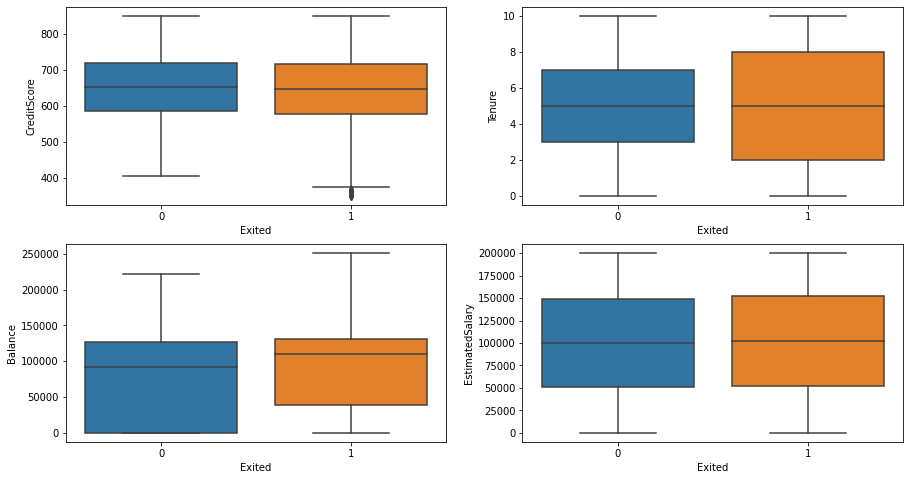

In [10]:
# Method 2
fig, axarr = plt.subplots(2, 2, figsize=(15, 8))
sns.boxplot(x = 'Exited',y='CreditScore', data = dataset_raw, ax=axarr[0][0])
sns.boxplot(x = 'Exited',y='Tenure',data = dataset_raw, ax=axarr[0][1])
sns.boxplot(x = 'Exited', y='Balance',data = dataset_raw, ax=axarr[1][0])
sns.boxplot(x = 'Exited', y='EstimatedSalary',data = dataset_raw, ax=axarr[1][1])


CreditStore,EstimateSalary and Tenure charts. Maybe They cannot predict for us about churning rate but for Balance chart gives us an useful informations:
we see that average customer balances Exited is greater than unExited customers. 

# Part 2

In [11]:
#Separate features and target variable

In [12]:
#dropping irrelevant data
dataset= dataset_raw.drop(["RowNumber","CustomerId","Surname"], axis =1)
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Last name, CustomerId, and RowNumber are attributes that have almost no effect on our results. As long as we have an index (quantity), it will act as an ID.

In [13]:
# Removing duplicate rows:
dataset.duplicated().sum()

0

In [14]:
#fill missing data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
Y = dataset['Exited']
#Tach X Y

In [16]:
X = dataset.drop('Exited', axis=1)
X.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63


We need to split a dataset into train and test sets to evaluate how well our machine learning model performs. The train set (X) is used to fit the model, the statistics of the train set are known. The second set is called the test data set (Y), this set is solely used for predictions.The objective of the bank is to predict the churn.so I choose "Exited" is the test data set (Y), this set is solely used for predictions.

# Variable encoding

In [17]:
dataset.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [18]:
#label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X.head(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


Gender is is categorical. We must transform it to numerical because most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.

In [19]:
label_encoder.classes_
# check rule encoder ?????

array(['Female', 'Male'], dtype=object)

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

oh_encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Geography'])], 
                               remainder='passthrough')
X_onehot = oh_encoder.fit_transform(X)
print(X_onehot[:6])

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00
  4.2000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 6.0800000e+02 0.0000000e+00
  4.1000000e+01 1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 5.0200000e+02 0.0000000e+00
  4.2000000e+01 8.0000000e+00 1.5966080e+05 3.0000000e+00 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 6.9900000e+02 0.0000000e+00
  3.9000000e+01 1.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00
  0.0000000e+00 9.3826630e+04]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 8.5000000e+02 0.0000000e+00
  4.3000000e+01 2.0000000e+00 1.2551082e+05 1.0000000e+00 1.0000000e+00
  1.0000000e+00 7.9084100e+04]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 6.4500000e+02 1.0000000e+00
  4.4000000e+01 8.0000000e+00 1.1375578e+05 2.0000000

Similar to Gender,Geography is categorical. We need to convert this categorical variables to numbers.

In [21]:
oh_encoder.named_transformers_['encoder'].categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [22]:
X = pd.get_dummies(X)
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


# Data set split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)
# y dang duoc gan cho Survived
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7500, 12)
(2500, 12)
(7500,)
(2500,)


We need to split a dataset into train and test sets to evaluate how well our machine learning model performs. The train set (X) is used to fit the model, the statistics of the train set are known. The second set is called the test data set (Y), this set is solely used for predictions.The objective of the bank is to predict the churn.so I choose "Exited" is the test data set (Y) this set is solely used for predictions.
Thats why i selected to use default est_train_split model which deliver 25% test set and 75% traing set.

In [24]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
651,720,1,52,7,0.00,1,1,1,14781.12,1,0,0
6560,577,0,32,1,0.00,2,1,0,9902.39,1,0,0
8974,706,0,43,1,0.00,2,1,0,31962.77,0,0,1
2348,824,1,45,3,129209.48,1,0,0,60151.77,1,0,0
5670,497,1,32,8,0.00,2,1,0,67364.42,1,0,0


# Scaling

In [26]:
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.preprocessing import StandardScaler
# scale ca train va test data
scaler = StandardScaler()
X_train[['Age', 'CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.fit_transform(X_train[['Age', 'CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['Age', 'CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['Age', 'CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']])

In [ ]:
Use StandardScaler, I want each feature to have zero-mean, unit standard-deviation.

In [17]:
X_train[['Age', 'CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']][:5]

,Age,CreditScore,Tenure,Balance,NumOfProducts,EstimatedSalary
651,1.256181,0.719980,0.683089,-1.228601,-0.910949,-1.480501
6560,-0.659527,-0.753272,-1.397668,-1.228601,0.800932,-1.565230
8974,0.394112,0.575745,-1.397668,-1.228601,0.800932,-1.182108
2348,0.585683,1.791436,-0.704082,0.844319,-0.910949,-0.692551
5670,-0.659527,-1.577469,1.029882,-1.228601,0.800932,-0.567289


In [18]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
651,0.719980,1,1.256181,0.683089,-1.228601,-0.910949,1,1,-1.480501,1,0,0
6560,-0.753272,0,-0.659527,-1.397668,-1.228601,0.800932,1,0,-1.565230,1,0,0
8974,0.575745,0,0.394112,-1.397668,-1.228601,0.800932,1,0,-1.182108,0,0,1
2348,1.791436,1,0.585683,-0.704082,0.844319,-0.910949,0,0,-0.692551,1,0,0
5670,-1.577469,1,-0.659527,1.029882,-1.228601,0.800932,1,0,-0.567289,1,0,0
